In [1]:
import seaborn as sns
import csv
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors 
import pandas as pd
from scipy import stats
from scipy.stats import multivariate_normal
import math
import random
from matplotlib import cm
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression as LR
from scipy.signal import find_peaks
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Q5

### Q5 a)

(100, 2)


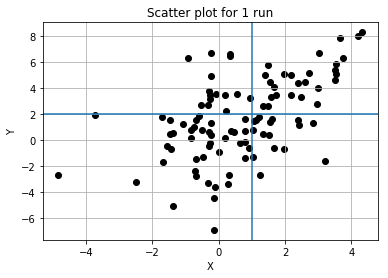

In [8]:
mean = [1,2]
var = [[4,4],[4,9]]
np.random.seed(22)
data = np.random.multivariate_normal(mean, var, 100)

print(data.shape)
plt.scatter(data[:,0],data[:,1],color='k')
plt.axhline(2)
plt.axvline(1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot for 1 run')
plt.grid()

### Function for given number of runs(=runs) and N samples

In [9]:
def gen_mean_var(runs,N):
    
    sample_mean=np.zeros(2)
    sample_cov=[[0,0],[0,0]]
    sample_cov=np.array(sample_cov)
    for i in range(runs):
        #generating the random numbers for given mean and variance
        data = np.random.multivariate_normal(mean, var, N)
        
        #sum up the mean to calculate the average
        sample_mean =sample_mean + np.array([data[:,0].mean(),data[:,1].mean()])
        
        #sum up the covariance to calculate the average
        sample_cov = sample_cov + np.cov(data[:,0],data[:,1])
    
    sample_mean= sample_mean/runs #required sample mean for N samples and runs=runs
    sample_cov = sample_cov/runs  #required sample covariance for N samples and runs=runs
    return data,sample_mean,sample_cov

### Q5 b)

In [10]:
data_1,sample_mean_1,sample_cov_1=gen_mean_var(1,100)
print('Sample mean:',sample_mean_1)
print('\n\nSample covariance matrix:\n',sample_cov_1)

Sample mean: [0.80406214 2.06550656]


Sample covariance matrix:
 [[ 4.87658654  4.98429773]
 [ 4.98429773 10.71705093]]


### Q5 c)

In [11]:
data_10,sample_mean_10,sample_cov_10=gen_mean_var(10,100)
print('Sample mean:',sample_mean_10)
print('\n\nSample covariance matrix:\n',sample_cov_10)

Sample mean: [1.07206173 2.05486939]


Sample covariance matrix:
 [[4.06725384 3.76422331]
 [3.76422331 8.24512189]]


### Q5 d)

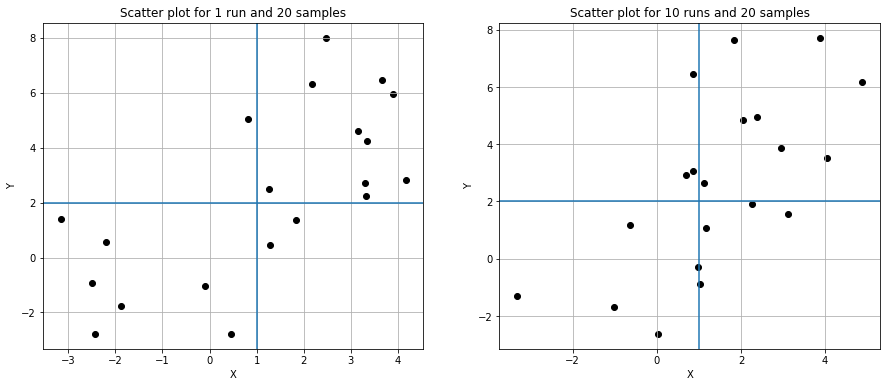

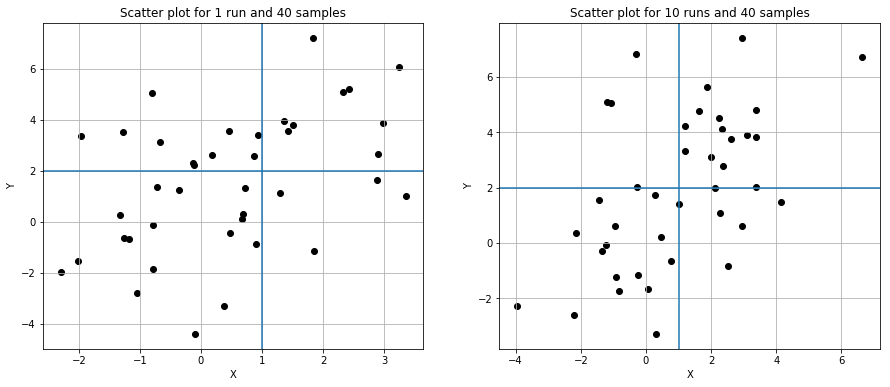

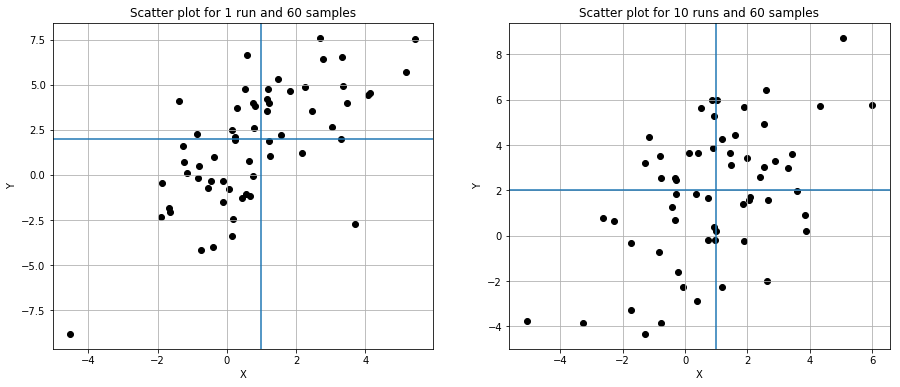

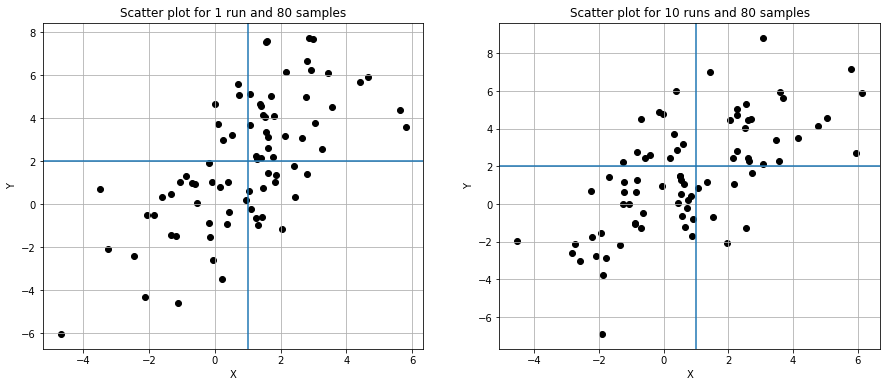

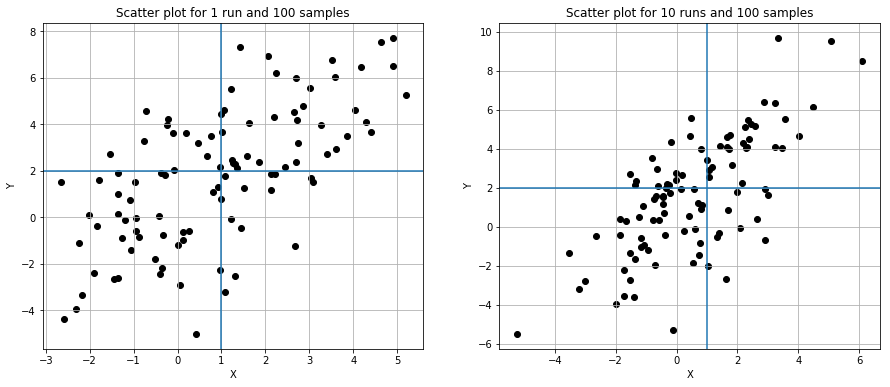

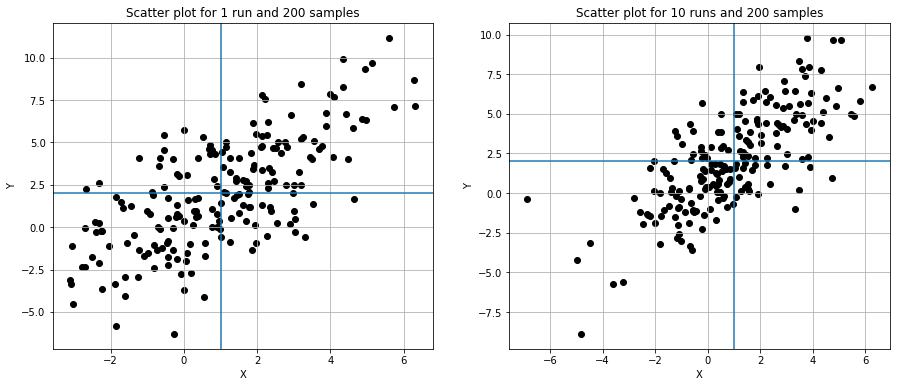

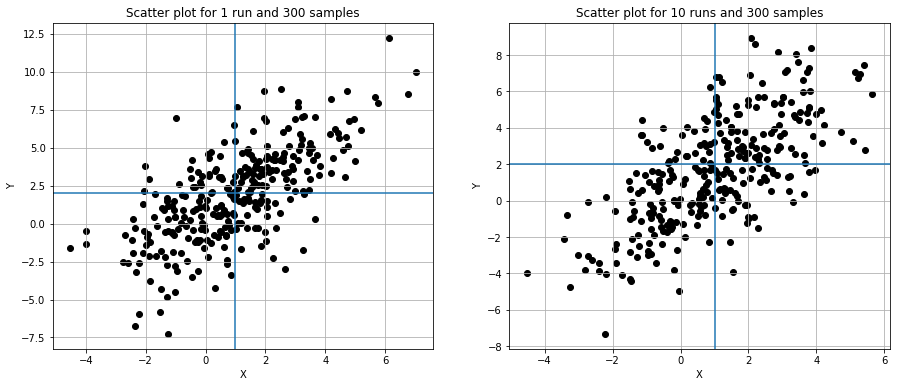

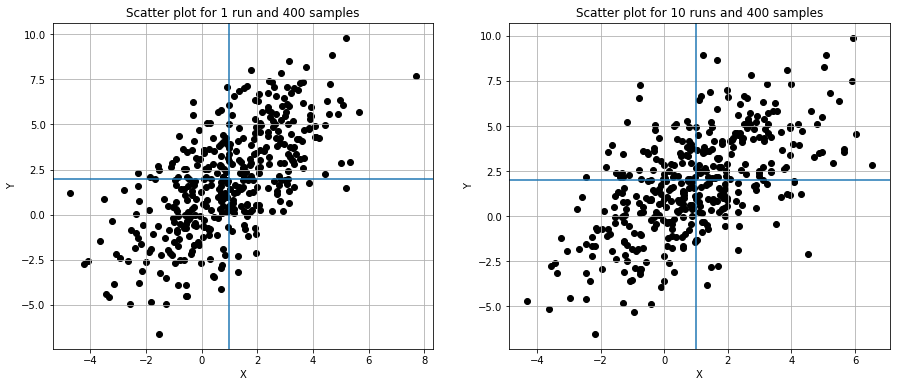

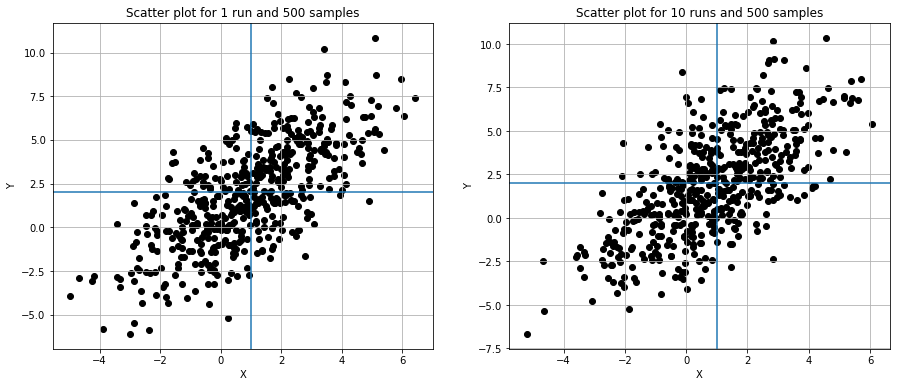

In [12]:
N=[20,40,60,80,100,200,300,400,500]
cols=['N','Mean_1','Covariance_1','Mean_10','Covariance_10']
cols2=['N','Mean_1 RMSE','Cov_1 RMSE','Mean_10 RMSE','Cov_10 RMSE']
df = pd.DataFrame(columns=cols)
err = pd.DataFrame(columns=cols2)

for n in N:
    df_list={}
    err_list={}
    fig,ax=plt.subplots(1,2,figsize=[15,6])
    temp_data,temp_mean,temp_cov = gen_mean_var(1,n)
    ax[0].scatter(temp_data[:,0],temp_data[:,1],color='k')
    ax[0].axhline(2)
    ax[0].axvline(1)
    ax[0].set_xlabel('X')
    ax[0].set_ylabel('Y')
    ax[0].set_title('Scatter plot for 1 run and '+str(n)+' samples')
    ax[0].grid(True)
    df_list[cols[0]] = n
    err_list[cols2[0]] = n
    df_list[cols[1]] = np.around(temp_mean,3)
    df_list[cols[2]] = np.around(temp_cov,3)
    err_list[cols2[1]] = np.around(mean_squared_error(mean,temp_mean),3)
    err_list[cols2[2]] = np.around(mean_squared_error(var,temp_cov),3)
    
    temp_data,temp_mean,temp_cov = gen_mean_var(10,n)
    ax[1].scatter(temp_data[:,0],temp_data[:,1],color='k')
    ax[1].axhline(2)
    ax[1].axvline(1)
    ax[1].set_xlabel('X')
    ax[1].set_ylabel('Y')
    ax[1].set_title('Scatter plot for 10 runs and '+str(n)+' samples')
    ax[1].grid(True)
    df_list[cols[3]] = np.around(temp_mean,3)
    df_list[cols[4]] = np.around(temp_cov,3)
    err_list[cols2[3]] = np.around(mean_squared_error(mean,temp_mean),3)
    err_list[cols2[4]] = np.around(mean_squared_error(var,temp_cov),3)
    
    plt.show()
    df=df.append(df_list,ignore_index=True)
    err=err.append(err_list,ignore_index=True)


**We can see from the scatter plots that as the number of samples increase the density of the points near the mean i.e., intersection of the two blue lines increase.**

### Required table 

In [9]:
df

,N,Mean_1,Covariance_1,Mean_10,Covariance_10
0,20,"[1.521, 2.83]","[[4.517, 2.33], [2.33, 3.943]]","[0.94, 1.797]","[[4.288, 4.157], [4.157, 9.308]]"
1,40,"[1.391, 2.319]","[[3.385, 4.835], [4.835, 9.939]]","[1.157, 2.181]","[[3.772, 3.76], [3.76, 9.185]]"
2,60,"[1.62, 2.883]","[[5.098, 4.733], [4.733, 10.006]]","[1.1, 2.079]","[[4.251, 4.227], [4.227, 9.037]]"
3,80,"[0.798, 1.892]","[[3.067, 2.19], [2.19, 6.196]]","[0.945, 1.927]","[[3.607, 3.546], [3.546, 8.622]]"
4,100,"[1.013, 1.812]","[[4.904, 4.428], [4.428, 8.992]]","[1.071, 1.975]","[[4.276, 4.478], [4.478, 9.793]]"
5,200,"[0.989, 1.775]","[[4.175, 4.048], [4.048, 9.2]]","[0.923, 1.998]","[[4.046, 4.167], [4.167, 9.217]]"
6,300,"[1.055, 1.842]","[[3.862, 3.682], [3.682, 8.525]]","[1.01, 2.052]","[[3.846, 3.776], [3.776, 8.692]]"
7,400,"[0.924, 1.981]","[[3.56, 3.906], [3.906, 8.738]]","[1.008, 1.998]","[[3.943, 3.934], [3.934, 8.984]]"
8,500,"[0.949, 1.861]","[[4.362, 4.269], [4.269, 8.452]]","[1.002, 2.049]","[[3.938, 3.95], [3.95, 8.907]]"


### RMSE for mean and covariance

In [10]:
err

,N,Mean_1 RMSE,Cov_1 RMSE,Mean_10 RMSE,Cov_10 RMSE
0,20.0,0.480,7.855,0.022,0.057
1,40.0,0.127,0.664,0.029,0.050
2,60.0,0.582,0.823,0.008,0.042
3,80.0,0.026,3.822,0.004,0.178
4,100.0,0.018,0.296,0.003,0.290
5,200.0,0.025,0.019,0.003,0.026
6,300.0,0.014,0.112,0.001,0.055
7,400.0,0.003,0.070,0.000,0.003
8,500.0,0.011,0.144,0.001,0.004


## Q6 ANOVA

In [13]:
def anova_table(n,runs):
    np.random.seed(22)
    mu=60
    sigma=12
    cols=['d.o.f','sum_sq','mean_sq','F']
    inbuilt_f=[]
    inbuilt_p=[]
    f_calc=[]
    ans_335=0
    for i in range(runs):
        A=np.random.normal(mu,sigma,n)        
        B=np.random.normal(mu,sigma,n)
        C=np.random.normal(mu,sigma,n)
        mean_a=A.mean()
        mean_b=B.mean()
        mean_c=C.mean()
        mu_total=(np.sum(A) + np.sum(B) + np.sum(C))/(len(A) + len(B) + len(C))
        
        #SSE and SSB
        sse = np.sum((A-mean_a)**2) + np.sum((B-mean_b)**2) + np.sum((C-mean_c)**2)
        ssb = len(A)*(mean_a - mu_total)**2 + len(B)*(mean_b - mu_total)**2 + len(C)*(mean_c - mu_total)**2
        
        #degree of freedom
        dof_ssb= 3 - 1
        dof_sse = 3*(len(A)-1)
        
        #F calculated
        F=ssb*dof_sse/(sse*dof_ssb)
        inbuilt_f.append(stats.f_oneway(A,B,C).statistic)
        inbuilt_p.append(stats.f_oneway(A,B,C).pvalue)
        
        #Array to maintain f value for all runs
        f_calc.append(F)
        
        #For calculating F>=3.35 proportion
        if F>=3.35:
            ans_335=ans_335+1
        if runs==1:
            data=np.zeros([2,4])
            data[0][0]=dof_ssb
            data[0][1]=ssb
            data[0][2]=ssb/dof_ssb
            data[1][0]=dof_sse
            data[1][1]=sse
            data[1][2]=sse/dof_sse
            data[0][3]=F
            df=pd.DataFrame(data=data,columns=cols,index=['SSB','SSE'])
            print('A: ',A)
            print('\nB: ',B)
            print('\nC: ',C)
            print()
            print(df)

        
    return f_calc,inbuilt_f,inbuilt_p,ans_335/len(f_calc)

## Q6 a) 

In [14]:
f,in_f,in_p,val=anova_table(10,1)
print('\nCorresponding pvalue:',in_p)

A:  [58.89660096 42.43979217 72.98150015 57.12809798 54.10645037 47.97273588
 71.02585804 46.75641479 67.51792148 53.26183463]

B:  [60.34626142 57.23079375 67.05302657 69.02781095 47.29796935 72.67166897
 68.97300319 72.77611906 78.24155505 42.13676477]

C:  [82.3198787  40.81664367 52.24711665 64.04790002 72.5607447  67.54972008
 64.35670914 66.66899636 46.93740562 60.28433726]

     d.o.f       sum_sq     mean_sq         F
SSB    2.0   215.501324  107.750662  0.813697
SSE   27.0  3575.369308  132.421085  0.000000

Corresponding pvalue: [0.4537913802184059]


**We can see that pvalue remains significantly large hence, we cannot reject the null hypothesis that the samples have the same mean or belong to the same population.**

## Q6 b) anova_table is the function for evaluating the fvalues for this question

In [15]:
f2,in_f2,in_p2,val = anova_table(10,200)
print('Proportion of F values that exceed F=3.35 : ',val)

Proportion of F values that exceed F=3.35 :  0.035


## Q6 c)

In [16]:
# in_p2

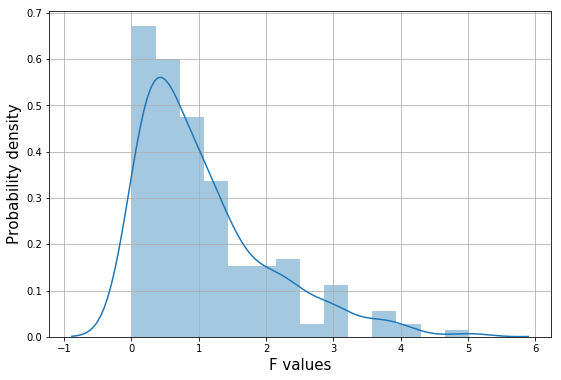

In [17]:
plt.figure(figsize=[9,6])
sns.distplot(f2)
plt.xlabel('F values',fontsize=15)
plt.ylabel('Probability density',fontsize=15)
plt.grid(True)
plt.show()
# plt.hist(f2,10)

### Q6 d)

Proportion of F values that exceed F=3.35 :  0.075


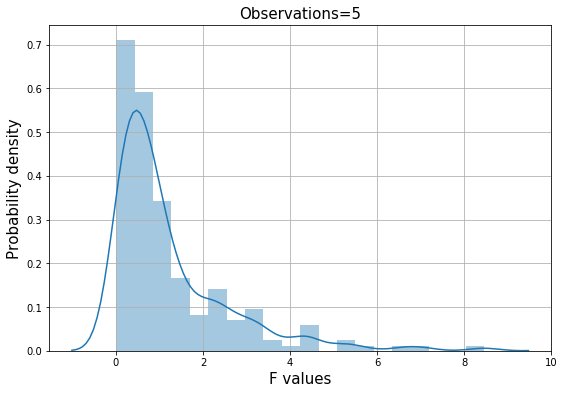

Proportion of F values that exceed F=3.35 :  0.035


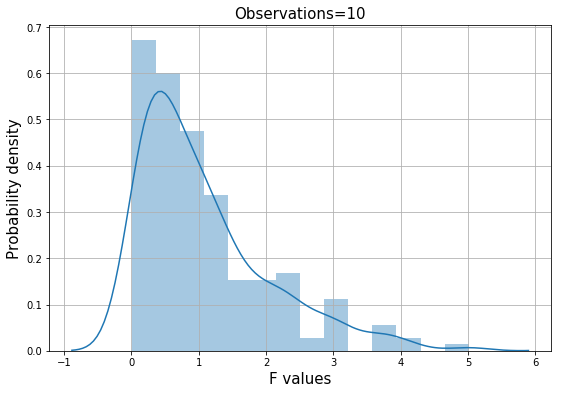

Proportion of F values that exceed F=3.35 :  0.055


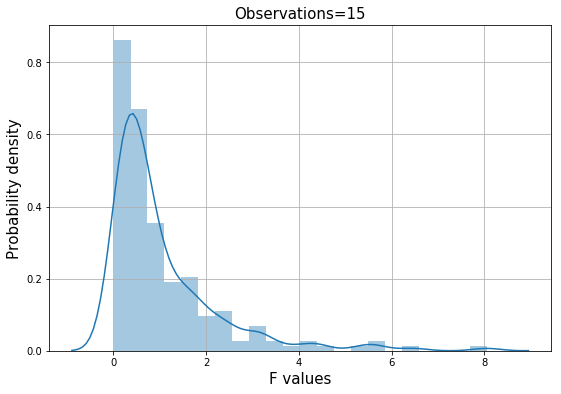

Proportion of F values that exceed F=3.35 :  0.03


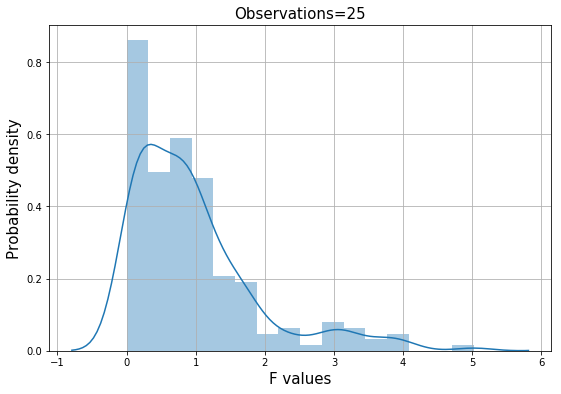

Proportion of F values that exceed F=3.35 :  0.04


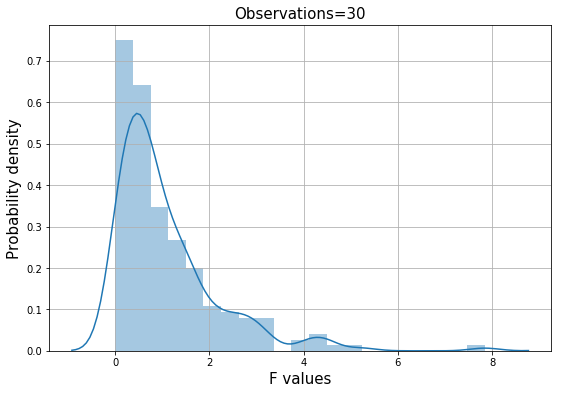

In [18]:
obs=[5,10,15,25,30]
arr_f=[[] for _ in range(len(obs))]
arr_in_f=[[] for _ in range(len(obs))]
arr_in_p=[[] for _ in range(len(obs))]
for i in range(len(obs)):
    arr_f[i],arr_in_f[i],arr_in_p[i],val = anova_table(obs[i],200)
    print('Proportion of F values that exceed F=3.35 : ',val)
    plt.figure(figsize=[9,6])
    sns.distplot(arr_f[i])
    plt.title('Observations='+str(obs[i]),fontsize=15)
    plt.xlabel('F values',fontsize=15)
    plt.ylabel('Probability density',fontsize=15)
    plt.grid(True)
    plt.show()


## Q7

In [19]:
#To calculate the linear fit of the data
def get_m_c(x,y):
    m= (np.mean(x)*np.mean(y) - np.mean(x*y))/(np.mean(x)*np.mean(x) - np.mean(x*x))
    c= np.mean(y) - m*np.mean(x)
    return m,c

#to produce plots of the given data and corresponding plot after eliminating the linear fit
def initial_plots(x,name):
    plt.figure(figsize=[7,5])
    plt.plot(x,'k')
    plt.xlabel('Index',fontsize=15)
    plt.ylabel('x',fontsize=15)
    plt.title('Initial plot for '+str(name),fontsize=15)
    plt.grid(True)
    plt.show()
    
    
    #Without linear component
    plt.figure(figsize=[7,5])
    idx=np.arange(1,len(x)+1,1)
    m,c=get_m_c(idx,x)
    x_linear=m*idx + c #predicting the linear fit
    xnew=x-x_linear # eliminating the linear component
    plt.plot(idx,xnew,'k') 
    plt.xlabel('Index',fontsize=15)
    plt.ylabel('x without linear part',fontsize=15)
    plt.title('Eliminating linear component for '+str(name),fontsize=15)
    plt.grid(True)
    return xnew

#To calculate the auto-correlation of the data
def get_autocorrelation(x):
    n=len(x)
    var=x.var()
    xmean=x.mean()
    x=x-xmean
    
    # as autocorrelation is symmetrical we only take positive half of it
    corr=np.correlate(x,x,mode='full')[-n:] 
    lengths = np.arange(n, 0, -1)
    corr /= var*lengths
    return corr

#To get the plot for auto-correlation v/s lag to notice the peaks 
def corr_plot(x,name):
    data_corr=get_autocorrelation(x)
    plt.figure(figsize=[7,5])
    plt.plot(data_corr,'k')
    plt.xlabel('Index',fontsize=15)
    plt.ylabel('Autocorrelation',fontsize=15)
    plt.title('For understanding periodicity of '+str(name),fontsize=15)
    plt.grid(True)
    return data_corr


#To calculate the periodicity of the data by making use of the peaks
def get_periodicity(x,name=None):
    peak,_=find_peaks(x,height=0)
    period=[]
    for i in range(1,len(peak)):
        period.append(peak[i]-peak[i-1])
    
    #maximum of the periods will form the periodicity of the data
    j=np.argmax(period)
    return period[j]

### Data 1

In [20]:
data=pd.read_csv('assignment1\data-ass1.csv')
print(data.head())


   Unnamed: 0         x
0           1  1.017390
1           2  1.010947
2           3  1.025943
3           4  1.031407
4           5  1.027881


### Q7 a)

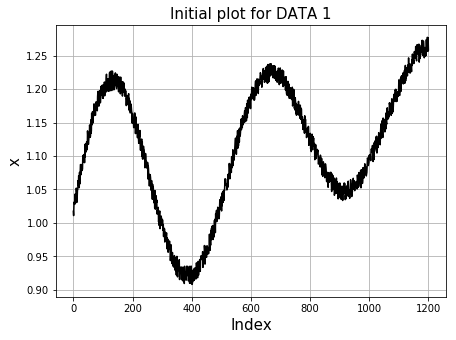

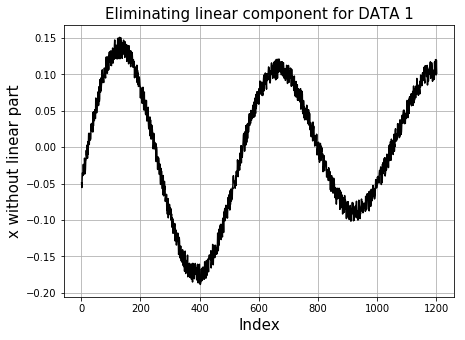

In [21]:
name='DATA 1'
x=data['x']
xnew=initial_plots(x,name)

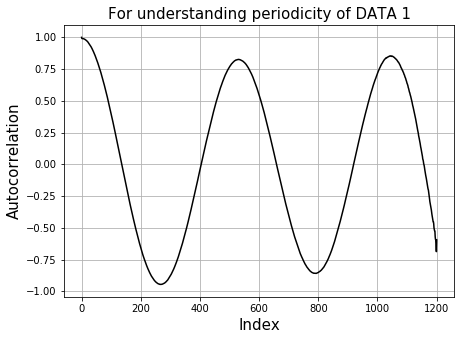

In [22]:
name='DATA 1'
data1_corr=corr_plot(xnew,name)

Periodicity of DATA 1:  518


Text(0.5, 1.0, 'Correctness of periodicity')

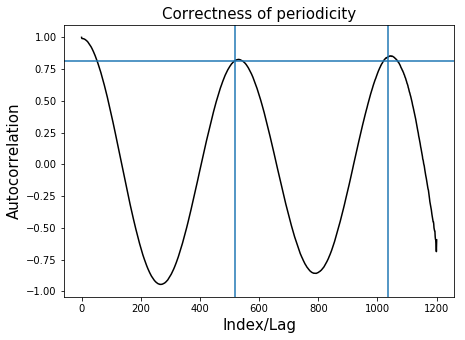

In [38]:
data1_period=get_periodicity(data1_corr)
print('Periodicity of DATA 1: ',data1_period)
plt.figure(figsize=[7,5])
plt.plot(data1_corr,'k')
plt.axvline(data1_period)
plt.axvline((data1_period)*2)
plt.axhline(data1_corr[data1_period])
plt.xlabel('Index/Lag',fontsize=15)
plt.ylabel('Autocorrelation',fontsize=15)
plt.title('Correctness of periodicity',fontsize=15)

### DATA 2

In [24]:
data2=pd.read_csv('assignment1\data2-ass1.csv')
print(data2.head())


   Unnamed: 0         x
0           1  1.017390
1           2  1.010229
2           3  1.024511
3           4  1.029264
4           5  1.025033


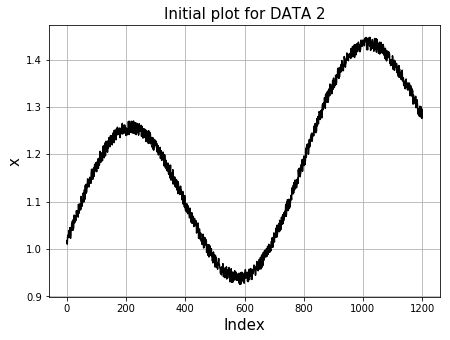

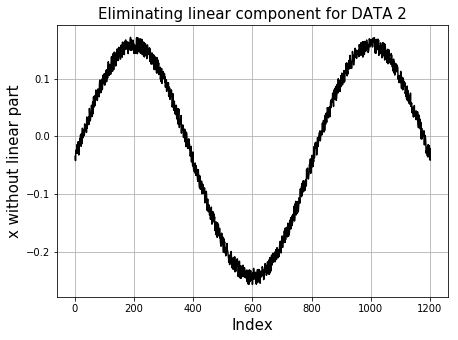

In [25]:
y=data2['x']
name='DATA 2'
ynew=initial_plots(y,name)

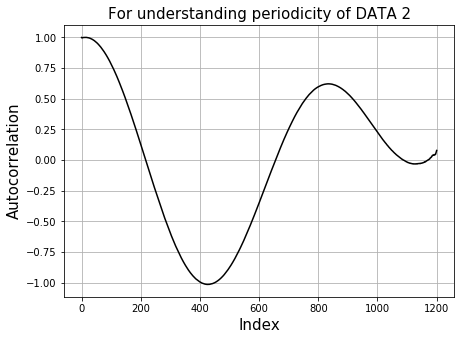

In [26]:
data2_corr=corr_plot(ynew,name)


Periodicity of DATA 2:  811


Text(0.5, 1.0, 'Correctness of periodicity')

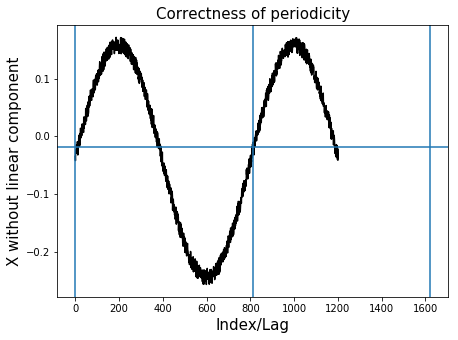

In [30]:
data2_period=get_periodicity(data2_corr)
print('Periodicity of DATA 2: ',data2_period)
plt.figure(figsize=[7,5])
plt.plot(ynew,'k')
plt.axvline(0)
plt.axvline(data2_period)
plt.axvline((data2_period)*2)
plt.axhline(ynew[data2_period])
plt.xlabel('Index/Lag',fontsize=15)
plt.ylabel('X without linear component',fontsize=15)
plt.title('Correctness of periodicity',fontsize=15)